# ***Iris Flower Classification - CodSoft Internship – Task 3***

# Import necessary libraries

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

#Load Dataset


In [20]:
df = pd.read_csv("IRIS.csv")  # Update the path if needed
print("Dataset loaded successfully.")
print(df.head())

Dataset loaded successfully.
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


#Check for null values

In [21]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


#  Exploratory Data Analysis

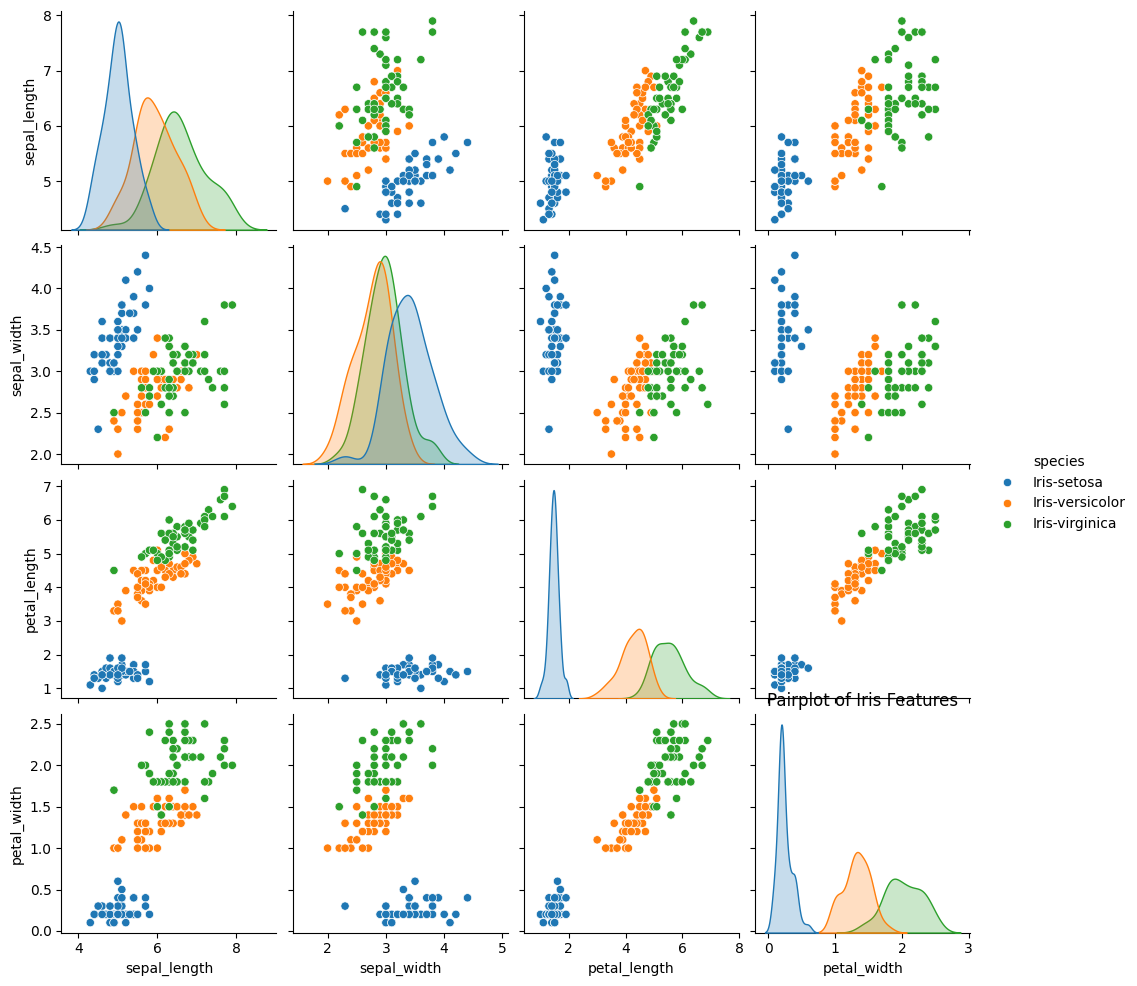

In [22]:
sns.pairplot(df, hue="species")
plt.title("Pairplot of Iris Features")
plt.savefig("pairplot.png")
plt.show()



In [23]:
from google.colab import files
files.download("pairplot.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

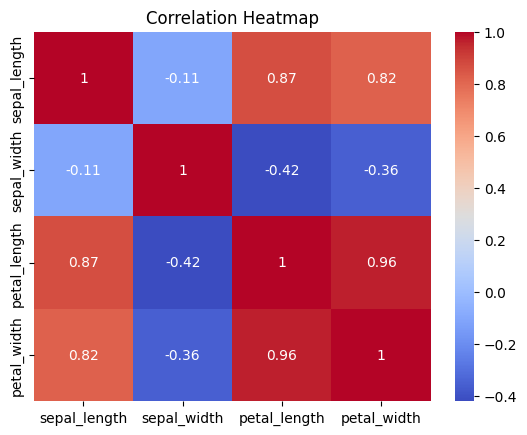

In [24]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()

In [25]:
from google.colab import files
files.download("correlation_heatmap.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#  Preprocessing

In [11]:
X = df.drop(['species'], axis=1)
y = df['species']

# Encode species labels

In [12]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)


# Split the data


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#  Model Training

In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("\nModel trained successfully.")


Model trained successfully.


#Predictions

In [15]:
y_pred = model.predict(X_test)


#  Evaluation


In [16]:
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Save the mode

In [17]:
joblib.dump(model, 'iris_model.pkl')
print("\nModel saved as 'iris_model.pkl'")


Model saved as 'iris_model.pkl'
